# Data Acquisition & Preprocessing

The purpose of this notebook is to describe the steps I took to acquire my data and the initial preprocessing required to wrangle it into a more usable format.

The final output will be a series of saved .pkl (pickle) files that will be used in future notebooks.

***

The Yelp Open Dataset is available for download here: https://www.yelp.com/dataset

A data dictionary along with an FAQ (Frequently Asked Questions) is available here: https://www.yelp.com/dataset/documentation/main

After signing up with your name and email address, three different downloads are made available to us:
1. The main dataset in JSON format (4.5 GB)
2. A library of over 200,000 photos (7.0 GB)
3. A small dataset recently added with data specifically related to COVID-19 (14 MB) 

For the purposes of this project, I will only be using the main dataset which downloads by default as a `yelp_dataset.tar` file.

I downloaded and extracted this file within the `/data` folder I created within my highest-level project folder location.

The `yelp_dataset.tar` file extracts itself into 5 seperate .json files within the `/data/yelp_dataset` folder, such as:
- yelp_academic_dataset_business.json (153 MB)
- yelp_academic_dataset_checkin.json (450 MB)
- yelp_academic_dataset_review.json (6.33 GB)
- yelp_academic_dataset_tip.json (264 MB)
- yelp_academic_dataset_user.json (3.27 GB)

Note: going forward, I will refer to each of the above files without the `yelp_academic_dataset_` prefix.

For example, the `yelp_academic_dataset_bsuiness.json` will be referred to as `business.json`, or simply as the `business` table.

***

Right of the bat, I am faced with two challenges when working with this dataset:
1. Rather than working with structured data using the .csv file type that we have been accustomed to working with in this program, the Yelp dataset contains unstructured data using the .json file type. As we will see later, some of the columns, specifically in the `business` table contain a series of dictionaries (key-value pairs) that are of a different size for each individual record.
2. Two of the .json files, specifically the `review` and `user` tables, are so large that are not able to be read into memory by pandas and hence will require some extra effort to make them usable for our purposes. 

The Yelp Open Dataset contains data for 10 major metropolitan areas. For this pilot project, I have decided to limit the scope to only use data relevant to the city of Toronto. This will allow me to considerably reduce the size of this dataset (hopefully, by a factor of 10 or more) and hence allow me to work with all of required data in-memory.

The remainder of this notebook is broken into 5 sections, 1 for each .json file.

I will first filter the data in the `business` table down to only those businesses found within Toronto and then filter each of the remaining tables by data only relevant to these Toronto businesses.

***

In [1]:
# Import Python libraries as needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

## 1.) BUSINESS TABLE

In [2]:
# Read in business table
business = pd.read_json('data/yelp_dataset/yelp_academic_dataset_business.json', lines = True)

In [3]:
# Review contents of business table
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [4]:
# Review first and last few records of the business table
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Department Stores, Food, Mobile Phones, Fashio...",None
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,1,None,"Pet Services, Pet Training, Pets","{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '..."


After reviewing the individual records of the business table, I have determined to take the following steps to filter down the number of records and hence reduce the scope of my recommendation system as follows:
- Use the `city` and `state` columns to filter records for only those businesses within the City of Toronto
- Use the `categories` column to filter records for only those businesses that are restaurants
- Use the `is_open` column to filter out all records for businesses that are closed

Furthermore, I will review and expand the `attributes` and `hours` columns, such that their values might be used to provide additional context and allow our users to further filter down our restaurant recommendations as per their preferences.

***

### 1.1) Filter down to businesses within the City of Toronto

In [5]:
# Count the number of records for each state
business['state'].value_counts()

# Ontario has 36627 records

AZ     60803
NV     39084
ON     36627
OH     16392
NC     16218
PA     12376
QC     10233
AB      8682
WI      5525
IL      2034
SC      1328
CA        23
NY        22
TX         6
WA         5
AL         3
FL         3
GA         3
CO         2
UT         2
BC         2
NE         2
MI         2
VT         2
CT         2
AR         1
AK         1
OR         1
XWY        1
MB         1
YT         1
HI         1
VA         1
HPL        1
MO         1
DOW        1
DUR        1
Name: state, dtype: int64

In [6]:
# Filter and update the business table to only contain businesses in Ontario
business = business[business['state'] == 'ON']

In [7]:
# Review the values in the city column
business['city'].value_counts()

Toronto             20364
Mississauga          3518
Markham              1962
North York           1318
Scarborough          1244
                    ...  
TORONTO                 1
Toronto-West            1
West Toronto            1
Thorncliffe Park        1
Mississaugua            1
Name: city, Length: 141, dtype: int64

As we can see, the data in the `city` column is not clean. 

We have some values entirely in upper/lower case, some spelling mistakes, and also some values that are invalid (for example, Centre Island).

First, I will attempt to reduce the errors by converting all values to lower case, and then I will review the list of cities to decide which ones to further filter upon.

In [8]:
# Convert list of cities to lower case, and count the number of unique values
business['city'].str.lower().value_counts()

toronto            20368
mississauga         3518
markham             1963
north york          1320
scarborough         1244
                   ...  
norval                 1
ansnorveldt            1
east gwilimbury        1
yorkdale               1
palgrave               1
Name: city, Length: 130, dtype: int64

Looks like we have reduced the unique city values from 141 to 130, a minor decrease.

Here, I have decided to further limit the scope of this project to only consider specifically those city names that fall within the official boundaries within the City of Toronto and not the Greater Toronto Area.

Given more time, I would have liked to investigate and research each of the 130 city names to determine exactly which to include. However, for this pilot project, I will review only top 50 cities with the highest counts and will make snap judgement without any research.

In [9]:
# Convert list of cities to lower case, and count the number of unique values
city_names = business['city'].str.lower().value_counts()
city_names.head(50)

toronto                      20368
mississauga                   3518
markham                       1963
north york                    1320
scarborough                   1244
richmond hill                 1152
brampton                      1146
vaughan                       1045
etobicoke                      843
thornhill                      433
newmarket                      412
oakville                       403
pickering                      371
ajax                           343
whitby                         323
aurora                         281
woodbridge                     264
east york                      166
concord                        140
york                           117
stouffville                     76
maple                           67
unionville                      57
whitchurch-stouffville          56
bolton                          55
georgetown                      40
halton hills                    38
bradford                        36
caledon             

In [10]:
# Save the selected cities from above list of 50 into a smaller list
selected_city_names = ['toronto', 'north york', 'scarborough', 'etobicoke', 'east york', 'york', 'don mills']

In [11]:
# Confirm city filter is working as intended and count the total number of selected records
print('Total value count for selected city names:', city_names[selected_city_names].sum())
city_names[selected_city_names]

Total value count for selected city names: 24063


toronto        20368
north york      1320
scarborough     1244
etobicoke        843
east york        166
york             117
don mills          5
Name: city, dtype: int64

In [12]:
# Filter the business table itself using the list of selected cities and confirm sum is same as total value count above
business[business['city'].str.lower().isin(selected_city_names)]['city'].value_counts().sum()

24063

In [13]:
# Filter and update the business table using the list of selected city names
business = business[business['city'].str.lower().isin(selected_city_names)]

In [14]:
# Divide current record count of business table vs. original
24063/209393

0.11491788168658933

***

### 1.2) Filter down businesses to those that are restaurants only

We will next take a look at the categories column and further filter our records by a selected group of categories.

At first we notice that each business can have a list of categories assigned to it.  In order to further analyze the individual categorical values, we will create a transform the column into a category matrix for further analysis.

In [15]:
# Review the unique values in the categories column
business['categories'].value_counts()

Coffee & Tea, Food                                                                                           224
Food, Coffee & Tea                                                                                           221
Hair Salons, Beauty & Spas                                                                                   171
Beauty & Spas, Hair Salons                                                                                   171
Restaurants, Chinese                                                                                         158
                                                                                                            ... 
Bike Repair/Maintenance, Professional Services, Shopping, Local Services, Sporting Goods, Bikes                1
Sandwiches, Restaurants, Breakfast & Brunch, Delis, Diners                                                     1
Fashion, Women's Clothing, Accessories, Shoe Stores, Men's Clothing, Department Stores, Jewelry,

In [16]:
# Review the first value in the categories column and its data type
print(business['categories'].iloc[0])
print(type(business['categories'].iloc[0]),'\n')

# Split the first value in the categories column by the comma and review its data type
print(business['categories'].str.split(', ').iloc[0])
print(type(business['categories'].str.split(', ').iloc[0]))

Martial Arts, Gyms, Fitness & Instruction, Active Life
<class 'str'> 

['Martial Arts', 'Gyms', 'Fitness & Instruction', 'Active Life']
<class 'list'>


Thus we will take the list of values stored as a string data type and convert it into a list.  Then we will use the `MultiLabelBinarizer` function via the `sklearn` package to break apart each of these individual category values into its own column.

In [17]:
# Convert categories column from a string type to a list of values
category_lists = business['categories'].str.split(', ')

In [18]:
# Drop all null values
category_lists = category_lists.dropna()

In [19]:
# Instantiate MLB
mlb = MultiLabelBinarizer()

# Transform the series containing the unqiue list of category values into an array
category_mlb = mlb.fit_transform(category_lists)

# Further transform said array into a data frame
category_matrix = pd.DataFrame(category_mlb, columns = mlb.classes_, index = category_lists.index)

In [20]:
# Review shape of new data frame
category_matrix.shape

# 24009 records (same as the number of records in the business df less the dropped NA values)
# 957 columns representing each unique category value

(24009, 957)

In [21]:
# Review the sum total of each unique category value
category_matrix.sum().sort_values(ascending = False).head(20)

Restaurants                  10171
Food                          5333
Shopping                      3956
Beauty & Spas                 2371
Nightlife                     2019
Bars                          1796
Coffee & Tea                  1721
Health & Medical              1345
Local Services                1213
Event Planning & Services     1159
Fashion                       1109
Specialty Food                1010
Chinese                        965
Sandwiches                     921
Active Life                    907
Hair Salons                    883
Breakfast & Brunch             866
Cafes                          836
Home Services                  813
Bakeries                       793
dtype: int64

As we can see above, our `business` table contains a varied set of business types (i.e. Shopping, Health & Medical, Fashion etc.), not just limited to restaurants and other businesses that sell food or drink.

The purpose of this pilot project is to exclusively make restaurant recommendations. Hence, I will now try to filter out all business values that do not belong to the `restaurant` category type, but before I do this, I want to make sure that: 1. the restaurant category is reliable enough such that there are no businesses that I would want to include in my recommender system that are not marked with the restaurant category.

In [22]:
# Save the list of unique category values and their value counts
list_of_categories = category_matrix.sum().sort_values(ascending = True)

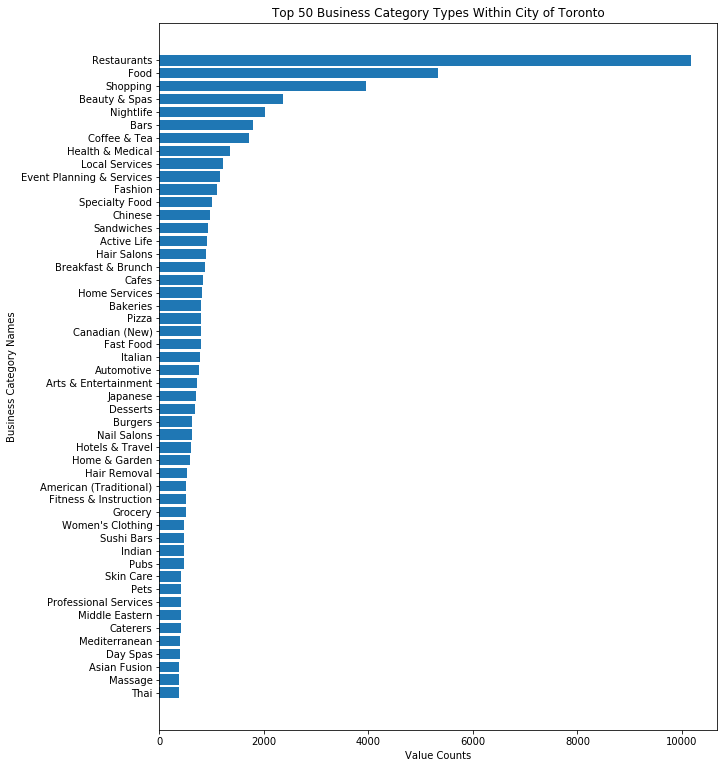

In [23]:
# Create a visualization showing the top 50 category values for the report
# Plot a horizontal bar chart for the sake of readability
plt.figure(figsize = (10,13))
plt.barh(list_of_categories.tail(50).index, list_of_categories.tail(50).values)
plt.title('Top 50 Business Category Types Within City of Toronto')
plt.ylabel('Business Category Names')
plt.xlabel('Value Counts')
plt.show()

In [24]:
# Export list of category values and category matrix to a .csv file for further analysis if needed
list_of_categories.to_csv('data/user/list_of_categories.csv')
category_matrix.to_csv('data/user/category_matrix.csv')

In [25]:
# Review all value counts for each category column where the Restaurant & Food categories are equal to 0
category_matrix[(category_matrix['Restaurants'] == 0) & (category_matrix['Food'] == 0)].sum().sort_values(ascending = False).head(50)

Shopping                     3611
Beauty & Spas                2342
Health & Medical             1304
Local Services               1182
Fashion                      1076
Hair Salons                   879
Active Life                   879
Home Services                 804
Automotive                    739
Event Planning & Services     654
Nightlife                     622
Nail Salons                   613
Hotels & Travel               565
Home & Garden                 557
Arts & Entertainment          536
Hair Removal                  528
Fitness & Instruction         495
Women's Clothing              473
Bars                          471
Skin Care                     412
Pets                          411
Professional Services         408
Day Spas                      384
Massage                       372
Auto Repair                   370
Accessories                   343
Doctors                       318
Education                     313
Men's Clothing                291
Sporting Goods

Here we see that selecting just these two categories takes care of all of the other minor food related categories. The only exceptions might be Nightlife & Bars, but for I am okay with excluding these categories to focus better on making restaurant recommendations only.

Also, unlike the `city` column, the `categories` column looks clean and does not include any typos.

In [26]:
# Review all value counts for each category column that coincides with the Food category but not with the Restaurant category
category_matrix[(category_matrix['Restaurants'] == 0) & category_matrix['Food'] == 1].sum().sort_values(ascending = False).head(50)

Food                         2654
Coffee & Tea                  853
Specialty Food                554
Bakeries                      437
Grocery                       422
Desserts                      345
Shopping                      238
Ice Cream & Frozen Yogurt     212
Juice Bars & Smoothies        142
Wine & Spirits                138
Beer                          138
Bubble Tea                    126
Health Markets                113
Convenience Stores            105
Event Planning & Services      95
Tea Rooms                      92
Chocolatiers & Shops           77
Meat Shops                     66
Caterers                       63
Nightlife                      59
Donuts                         59
Bars                           54
Food Delivery Services         53
Fruits & Veggies               49
Seafood Markets                49
Cheese Shops                   45
Arts & Entertainment           44
Butcher                        41
Breweries                      41
Health & Medic

Here we see that non-Restaurant, but Food-type businesses are fairly generic and include Coffee shops, Grocery chains, Dessert shops, etc. While I would like to expand on the scope of my project to include some of these businesses in the future, at the moment, this analysis has reassured me that I can safely filter the `business` table to only those records which are marked with the `Restaurants` tag within the `categories` column.

In [27]:
# Filter and update the business table by excluding all records where the 'categories' column is blank
business = business[business['categories'].isna() == False]

In [28]:
# Filter and update the business table to exclude all records which do not include the 'Restaurants' tag within the 'categories' column
business = business[business['categories'].str.contains('Restaurants')]

***

### 1.3) Filter out all businesses that are closed

Here we will exclude all businesses that are marked as closed, using the `is_open` column.

In [29]:
# Filter and update the business table to exclude all Restaurants marked as closed
business = business[business['is_open'] == 1]

***

### 1.4) Further clean-up of the `business` table

In [30]:
# Drop the 'state' and 'is_open' columns from the business table as they are now redundant
business.drop(columns = ['state', 'is_open'], inplace = True)

In [31]:
# Reset the index of the business table now that we have finished filtering down the number of records
business.reset_index(inplace = True)

In [32]:
# Drop the newly created index column
business.drop(columns = 'index', inplace = True)

***

### 1.5) Review and expand the `attributes` column

In [33]:
# Create an matrix of attribute values using the 'attributes' column from the 'business' table
attribute_matrix = business.loc[:, 'attributes'].apply(lambda x: pd.Series(eval(str(x))))

/Users/yhussain8/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [34]:
# Fill in all NA values with 'False'
attribute_matrix.fillna('False', inplace = True)

In [35]:
# Review of the list of all business attributes
attribute_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   RestaurantsTakeOut          6558 non-null   object
 1   Alcohol                     6558 non-null   object
 2   GoodForKids                 6558 non-null   object
 3   RestaurantsPriceRange2      6558 non-null   object
 4   RestaurantsAttire           6558 non-null   object
 5   RestaurantsDelivery         6558 non-null   object
 6   Ambience                    6558 non-null   object
 7   BusinessParking             6558 non-null   object
 8   RestaurantsGoodForGroups    6558 non-null   object
 9   RestaurantsReservations     6558 non-null   object
 10  OutdoorSeating              6558 non-null   object
 11  NoiseLevel                  6558 non-null   object
 12  GoodForMeal                 6558 non-null   object
 13  WiFi                        6558 non-null   obje

Here we see some interesting business attributes pertaining to restaurants, that our users might want to filter down their results by.

In [36]:
# Save the attribute matrix to a .csv file for further analysis if needed
attribute_matrix.to_csv('data/user/attribute_matrix.csv')

***

### 1.6) Review and expand the `hours` column

In [37]:
# Create an matrix of business hours of operation values using the 'hours' column from the 'business' table
hours_matrix = business.loc[:, 'hours'].apply(lambda x: pd.Series(eval(str(x))))

/Users/yhussain8/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [38]:
# Save the hours of operation matrix to a .csv file for further analysis if needed
hours_matrix.to_csv('data/user/hours_matrix.csv')

In [39]:
hours_matrix

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,11:0-22:0,11:0-22:0,12:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0:0-0:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,8:30-17:0,8:30-17:0
...,...,...,...,...,...,...,...
6553,12:0-23:0,12:0-23:0,12:0-23:0,12:0-23:0,12:0-23:0,12:0-23:0,15:0-22:0
6554,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,12:0-22:0
6555,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0
6556,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:0,NaN


In [40]:
# Save the final version of the business table as a .pkl (pickle) file for use in other notebooks
business.to_pickle('data/user/business.pkl')

***

## 2.) CHECK-IN TABLE

In [41]:
# Read in checkin table
checkin = pd.read_json('data/yelp_dataset/yelp_academic_dataset_checkin.json', lines = True)

In [42]:
# Review the contents of the checkin table
checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175187 entries, 0 to 175186
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  175187 non-null  object
 1   date         175187 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [43]:
# Review the first and last few records of the checkin table
checkin

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."
...,...,...
175182,zzvlwkcNR1CCqOPXwuvz2A,"2017-05-06 20:05:15, 2017-05-12 22:37:03, 2017..."
175183,zzwaS0xn1MVEPEf0hNLjew,"2010-02-16 02:09:56, 2010-07-05 05:40:48, 2010..."
175184,zzwhN7x37nyjP0ZM8oiHmw,"2016-03-06 13:27:02, 2016-03-09 00:41:53, 2016..."
175185,zzwicjPC9g246MK2M1ZFBA,"2012-09-22 00:26:15, 2012-09-23 20:12:00, 2012..."


In [44]:
# Review the first value in 'date' column
print(type(checkin.iloc[0,1]))
checkin.iloc[0,1]

<class 'str'>


'2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016-10-15 02:45:18, 2016-11-18 01:54:50, 2017-04-20 18:39:06, 2017-05-03 17:58:02, 2019-03-19 22:04:48'

Here we see that checkin table exists solely to provie a list of dates and times when users have "checked into" each respective restaurant. We can use this data to determine those restaurants that are trending up or down based on the frequency of their "check-ins". 

This will help us avoid the problem of providing stale recommendations.

In [45]:
# Create a series of just the `business_id` values from our filtered down list of restaurants
business_id = business['business_id']

In [46]:
# Complete an inner join of the checkin table using our list of filtered down 'business_id' values
checkin = pd.merge(checkin, business_id, on = 'business_id', how = 'inner')

In [47]:
# Review the new shape of the checkin table
checkin.shape

(6400, 2)

In [48]:
# Reset the index values of the checkin table
checkin.reset_index(inplace = True)

# Drop the newly created index column as it is now redundant
checkin.drop(columns = 'index', inplace = True)

In [49]:
# Save the updated checkin table to a .pkl file for use in future notebooks
checkin.to_pickle('data/user/checkin.pkl')

***

## 3.) REVIEW TABLE

Note: Due to the very large size of the `review.json` file (over 6 GBs), pandas does not allow me to read-in the entire file into memory in one step. To overcome this obstacle, we will read in the data from the .json file in 'chunks' using the `chunksize` parameter within the `pd.read_json()` function.

We will then complete an inner join on each individual chunk of the `review` table using our filtered down list of `business_id` values.

Reference to the blog where I learnt how to use the chunking functionality of the `read_json` function:

https://towardsdatascience.com/converting-yelp-dataset-to-csv-using-pandas-2a4c8f03bd88

In [50]:
# Read in review table in chunks of 100K records at a time
review_chunks = pd.read_json('data/yelp_dataset/yelp_academic_dataset_review.json', lines = True, chunksize = 100000)

# Show the data type of the newly created 'review_chunks' object
type(review_chunks)

pandas.io.json._json.JsonReader

In [51]:
%%time
# Capture the cell execution time (approx. 1 min 50 sec. for my computer)

# Create an empty list to store each individual chunk (after we have filtered down the records)
merged_chunk_list = []

# Loop over the different chunks of review data
for review_chunk in review_chunks:
    
    # Complete an inner join between each chunk of the review table and our list of 'business_id' values
    merged_chunk = pd.merge(review_chunk, business_id, on = 'business_id', how = 'inner')
    
    # Print the number of records remaining for each individual chunk after the inner join
    # This will also serve as a progress indicator as this cell will take a lot of time
    print(merged_chunk.shape[0])
    
    # Append the remaining records for each individual chunk into our list of merged chunks
    merged_chunk_list.append(merged_chunk)

4342
4274
4187
4280
4100
3972
3530
3883
5226
5112
5072
5037
4910
4733
4368
4377
4985
4915
4981
4928
4825
4521
4379
4272
4792
4643
4517
4838
4521
4517
4259
4099
4882
5124
5211
5311
4991
4751
4084
4017
4218
4508
4467
4479
4436
4384
4088
3886
5057
5422
5514
5384
5144
5181
4349
4167
4872
4701
4689
4802
4650
4669
4123
3839
5901
6536
6492
6444
6300
6269
4857
4513
4552
4484
4441
4562
4438
4495
4129
4139
751
CPU times: user 1min 34s, sys: 12.7 s, total: 1min 47s
Wall time: 1min 47s


In [52]:
# Combine the list of individual chunks into one single data-frame using an outer join
# Setting 'ignore_index' = True will ignore the index value of each individual chunk and thus create a new index only using the total number of records being combined
review = pd.concat(merged_chunk_list, ignore_index = True, join = 'outer')

In [53]:
# Review the contents of the review table
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378098 entries, 0 to 378097
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    378098 non-null  object        
 1   user_id      378098 non-null  object        
 2   business_id  378098 non-null  object        
 3   stars        378098 non-null  int64         
 4   useful       378098 non-null  int64         
 5   funny        378098 non-null  int64         
 6   cool         378098 non-null  int64         
 7   text         378098 non-null  object        
 8   date         378098 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 26.0+ MB


In [54]:
# Review the first and last few records of the review table
review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Tyx7AxYQfSRnBFUIXUJwFA,HJECayULRM-6xh2GCCvLiA,l-nL4BmhzpZjcavooO48PQ,4,2,1,1,ORDER In (Delivery) Review\n\nI discovered thi...,2015-10-17 01:38:13
1,KBCqABnVOKakrHgJexftCw,n8sZMywJ2q-A12BIewfCFA,l-nL4BmhzpZjcavooO48PQ,5,1,0,0,"The Wokker is the best, most authentic Chinese...",2012-12-04 23:28:29
2,G2OVt3FJRvZOSneyKiJiCg,F3Mu8M7bGbW960OwTvPnSw,l-nL4BmhzpZjcavooO48PQ,1,0,0,0,In Toronto on business. Ordered for room servi...,2018-06-19 22:21:31
3,xr8SzeX2KQFRi0j0NGNvPg,_kHCQq3jwjcwObk2nfuVpQ,l-nL4BmhzpZjcavooO48PQ,4,0,0,0,Great lunch specials with awesome quality and ...,2014-09-10 17:50:12
4,tHmijAvf0AC0vhXhOWF_Hw,bRWBfRJEtf6N-wQen7VFsg,l-nL4BmhzpZjcavooO48PQ,1,0,0,0,We've ordered delivery from this restaurant fo...,2013-02-25 00:18:21
...,...,...,...,...,...,...,...,...,...
378093,vW6nh0OiTdUK6PLHmVgPTA,MdlfKwGc4eVQy9veG7OlGQ,_PqvLxLW1uZJlJZzGMWErQ,4,1,0,0,I was craving bubble tea while walking downtow...,2018-01-21 17:01:12
378094,us5bXrHs6U3Pxto8eZqHug,tpMiI4-FkDK5GgTYfyDitA,AVqjAx6j4HAvUb8t3_lv8Q,4,0,0,0,"If THIS is a Canadian ""Dive Bar"" I'm down with...",2019-09-12 01:07:18
378095,8FDrv8VbJVjAjTEQHojQzQ,zsJFjhBQEFQ6gJ7BsNM_Ug,AY4WY_rfrQum3Ad_ohNhVw,4,3,0,1,Purchased 6 samosas of different fillings with...,2018-12-17 19:29:28
378096,rBfr17beQCItyFrqdxOFEw,O8kmR1np3bcF_--U1vDkYA,5_2Lls-h_shbRGyUruLlTQ,5,2,0,0,Come for the food but stay for the staff! \n\n...,2015-04-16 02:27:54


In [55]:
# Review the first value in 'text' column
print(type(review.iloc[0,7]))
review.iloc[0,7]

<class 'str'>


'ORDER In (Delivery) Review\n\nI discovered this place from the front desk of the airport hotel and they recommended it highly. I called to place my order for Delivery to my room. They were very accommodating.\n\nWon Ton Soup - nice broth and tender won tons.\n\nChicken with Diced vegetables and Cashews - again, fresh vegetables were used, and good sized pieces of chicken.\n\nCrispy Beef - much like a Ginger Beef, nice serving of Beef with a sweet chilli sauce. Very tasty.\n\nBroccoli in Garlic sauce - came with peppers,Onions , Broccoli was not over done.\n\nAll in all for Delivery , this was really good. I am used to going to Authentic Asian in Vancouver. This hit the spot, and they also sent me a nice tub of Chilli Oil because I like it Hot.'

In [56]:
# Save the updated review table to a .pkl file for use in future notebooks
review.to_pickle('data/user/review.pkl')

***

## 4.) TIP TABLE

In [57]:
# Read in tip table
tip = pd.read_json('data/yelp_dataset/yelp_academic_dataset_tip.json', lines = True)

In [58]:
# Review the contents of the tip table
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320761 entries, 0 to 1320760
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_id           1320761 non-null  object        
 1   business_id       1320761 non-null  object        
 2   text              1320761 non-null  object        
 3   date              1320761 non-null  datetime64[ns]
 4   compliment_count  1320761 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 50.4+ MB


In [59]:
# Review the first and last few records of the tip table
tip

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0
...,...,...,...,...,...
1320756,ayaRhAPJxrP-AQq6KeiBhg,ImkAc07Pppz0D3KC4iBTng,I love this place,2019-05-03 23:53:17,0
1320757,PWX9qW1zOXKyILZAtP8OTQ,nizlIF4pl2_6zZkFITBApA,"Amazing cookies, great staff, great delivery! ...",2019-05-02 00:09:01,0
1320758,99L0bntmbChEwShH440C2Q,10jP6njt3elD90gaHF1FBQ,Just perfect. Had this ice cream 3 times in 1 ...,2019-08-05 01:53:37,0
1320759,I8DpwNemLrFnAuCAYmu_sw,gA9hCYY7MYl9oZ3aym5dvw,Orgasm rolls are on point!!!,2019-03-29 23:36:01,0


In [60]:
# Complete an inner join of the tip table using our list of filtered down 'business_id' values
tip = pd.merge(tip, business_id, on = 'business_id', how = 'inner')

In [61]:
# Review the new shape of the tip table
tip.shape

(47508, 5)

In [62]:
# Reset the index values of the tip table
tip.reset_index(inplace = True)

# Drop the newly created index column as it is now redundant
tip.drop(columns = 'index', inplace = True)

In [63]:
# Save the updated tip table to a .pkl file for use in future notebooks
tip.to_pickle('data/user/tip.pkl')

***

## 5.) USER TABLE

Note: Just like the `review.json` file, the `user.json` file is a very large file to read in from its source (over 3 GBs). While, it can be read into memory, it takes a very long time to do. Therefore, I will use the same chunking methodology as I used to read in the `review` table to read in the `user` table.

However, in this case, rather than joining values with the `business_id` values, we will be comparing each record in the `user` table with the `user_id` values from both the `review` and `tip` tables.

In [64]:
# Read in review table in chunks of 100K records at a time
user_chunks = pd.read_json('data/yelp_dataset/yelp_academic_dataset_user.json', lines = True, chunksize = 100000)

In [65]:
# Capture all the 'user_id' values from the 'review' table into a series
user_id = review['user_id']

In [66]:
# Append the 'user_id' values from the 'tip' table to the 'user_id' series
user_id = user_id.append(tip['user_id'])

In [67]:
# Filter and update the 'user_id' series to only include non-duplicate values
user_id = user_id[~user_id.duplicated()]

In [68]:
%%time
# Capture the cell execution time (approx. 1 min. for my computer)

# Create an empty list to store each individual chunk (after we have filtered down the records)
merged_chunk_list = []

# Loop over the different chunks of user data
for user_chunk in user_chunks:
    
    # Complete an inner join between each chunk of the user table and our list of 'user_id' values
    merged_chunk = pd.merge(user_chunk, user_id, on = 'user_id', how = 'inner')
    
    # Print the number of records remaining for each individual chunk after the inner join
    # This will also serve as a progress indicator as this cell will take a lot of time
    print(merged_chunk.shape[0])
    
    # Append the remaining records for each individual chunk into our list of merged chunks
    merged_chunk_list.append(merged_chunk)

9541
8605
6758
6417
6276
6139
5241
5215
4838
4736
4296
4226
4124
3928
3665
3648
3334
3223
3120
2117
CPU times: user 45.4 s, sys: 6.81 s, total: 52.2 s
Wall time: 52.2 s


In [69]:
# Combine the list of individual chunks into one single data-frame using an outer join
# Setting 'ignore_index' = True will ignore the index value of each individual chunk and thus create a new index only using the total number of records being combined
user = pd.concat(merged_chunk_list, ignore_index = True, join = 'outer')

In [70]:
# Review the contents of the review table
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99447 entries, 0 to 99446
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             99447 non-null  object 
 1   name                99447 non-null  object 
 2   review_count        99447 non-null  int64  
 3   yelping_since       99447 non-null  object 
 4   useful              99447 non-null  int64  
 5   funny               99447 non-null  int64  
 6   cool                99447 non-null  int64  
 7   elite               99447 non-null  object 
 8   friends             99447 non-null  object 
 9   fans                99447 non-null  int64  
 10  average_stars       99447 non-null  float64
 11  compliment_hot      99447 non-null  int64  
 12  compliment_more     99447 non-null  int64  
 13  compliment_profile  99447 non-null  int64  
 14  compliment_cute     99447 non-null  int64  
 15  compliment_list     99447 non-null  int64  
 16  comp

In [71]:
# Review the first and last few records of the checkin table
user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,I_6wY8_RsewziNnKhGZg4g,Jeff,405,2010-08-05 18:42:29,799,244,312,"2010,2011,2012,2013,2014,2015,2016,2017","OGa2q6LvuQLYFUG_RCcALw, 0uM2R-uMBemiNlrFG5j56A...",13,...,8,3,0,1,19,48,76,76,14,6
1,q-v8elVPvKz0KvK69QSj1Q,Lisa Marie,666,2009-05-19 01:42:25,2993,1281,1832,"2011,2012,2013,2014,2015,2016,2017,2018","rt1KveqwFMnkN6dXKg5Qyg, NfnKx3z7zFottS3yHabw1g...",197,...,11,11,13,7,120,150,135,135,42,72
2,EFM7rmwvSEUbEGMWSNCnhQ,Brittney,44,2010-03-05 04:40:37,153,71,61,2011,"6k0pxvYMq3DdpO8YJGBe6A, xtB77qTiYR2VknLcmpx4ow...",4,...,4,1,0,0,18,6,12,12,4,1
3,dIIKEfOgo0KqUfGQvGikPg,Gabi,2061,2007-08-10 19:01:51,20024,9684,16904,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","6Y-l3x4LpUNhTBVMTFmTmA, HYNhRw_-8g660mpnwY2VJA...",971,...,85,94,231,96,1171,3272,2169,2169,463,281
4,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1218,2005-03-14 20:26:35,15024,10028,11288,"2006,2007,2008,2009,2010,2011,2012,2013,2014","F7bHTW_7Z-g2R6T7VkAOpg, 24j4WfSmbXiRUgzCNLaG9Q...",1354,...,163,190,361,147,1211,5688,2539,2539,815,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99442,F7iIYDy7Z1wVGk7eD3XuVg,Umang,1,2017-01-29 08:21:01,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
99443,F2wMZqrw5Q0maHQnFKRQqg,Pavel,1,2014-07-08 23:54:53,11,0,1,,None,0,...,0,0,0,0,1,0,0,0,0,0
99444,I6Gfu_9dGlCu8BzkEYFVxA,Tigger,1,2018-06-09 15:13:27,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
99445,N8CPLujF2xJE9x74B1ew8g,Steph,1,2014-08-01 15:12:58,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Save the updated user table to a .pkl file for use in future notebooks
user.to_pickle('data/user/user.pkl')